# Question 1

## 1. Line b/w two points

In [1]:


def line_bw_points(A, B):
    """
    Parameters:
    ----------
    A: first point, tuple
    B: second point, tuple
    Returns:
    --------
    tuple: (x coefficient, y coeffiecient, slop of line)
    """
    x_coff = B[1] - A[1] 
    y_coff = A[0] - B[0]
    c = x_coff*A[0] + y_coff*A[1]
    # print(f"the line b/w {A} and {B} is {x_coff}x + {y_coff}y = {c}")
    return (x_coff, y_coff, c)

line_bw_points((2,1), (5,3))

(2, -3, 1)

## 2. Distance b/w two points

In [2]:
import numpy as np
def distance_bw_points(A, B):
    """
    Arguments:
    ----------
    A: first point, tuple
    B: second point, tuple
    Returns:
    --------
    dist: float, distance 
    """
    A = np.array(A)
    B = np.array(B)

    return np.linalg.norm(A - B)

distance_bw_points((2,1), (5,3))


3.605551275463989

## 3. Perpendicular distance a point and a line segment

In [3]:
def perpendicular_dis(A, line):
    """
    Arguments:
    ----------
    A: a point, tuple
    line: points of lines, tuple
    Returns:
    --------
    dis: float
    """
    return abs((line[0] * A[0] + line[1] * A[1] + line[2])) / np.sqrt(np.square(line[0]) + np.square(line[1]))
    
perpendicular_dis((-11, -24), (1, -9, -3))

22.307168267119

## 4. distance b/w a point and a polygon

In [4]:
from sympy import Polygon, Point
def distance_from_polygon(A, poly_ver):
    """
    Arguments:
    ----------
    A: a point
    poly: vertices of polygon, list of tuples
    Returns:
    --------
    float
    """
     
    poly = Polygon(*[Point(i) for i in poly_ver])

    return poly.distance(Point(A[0], A[1]))

distance_from_polygon((3,5), [(0, 2), (0, 1), (1, 0), (1, 2)])


sqrt(13)

## 5. Tangent vector to a polygon

In [27]:
import pyvisgraph as vg
def visibility_graph_path( start, goal):
        """
        Arguments:
        ----------
        start: start point, tuple
        goal: goal point, tuple
        Returns:
        --------
        shortest: shortest path
        """
        polys = [[vg.Point(start[0], start[1]), vg.Point(goal[0], goal[1]), vg.Point(-0.25,-0.5),
                  vg.Point(0.5,-0.5), vg.Point(0.5,0.5), vg.Point(-0.5,0.5),
                  vg.Point(-0.5,-0.25), vg.Point(0.25,-0.25)]]
        
        g = vg.VisGraph()
        g.build(polys)
        shortest = g.shortest_path(vg.Point(start[0], start[1]), vg.Point(goal[0], goal[1]))
        print(shortest)
        return shortest, g
start_point = (0, -0.4)
end_point =  (0,0)
polys = [[vg.Point(start_point[0], start_point[1]), vg.Point(end_point[0], end_point[1]), vg.Point(-0.25,-0.5),
                  vg.Point(0.5,-0.5), vg.Point(0.5,0.5), vg.Point(-0.5,0.5),
                  vg.Point(-0.5,-0.25), vg.Point(0.25,-0.25)]]
shortest_path, g = visibility_graph_path(start_point, end_point)
point = vg.Point(1, 2)
# g.closest_point(point,polys)

g.find_visible(point) # posible vectors
# g.visgraph


100%|██████████| 1/1 [00:00<00:00, 417.01it/s]

[Point(0.00, -0.40), Point(0.25, -0.25), Point(0.00, 0.00)]



(0.00, -0.40): ((0.00, -0.40), (0.25, -0.25))
(0.25, -0.25): ((0.00, -0.40), (0.25, -0.25))
(-0.25, -0.50): ((-0.25, -0.50), (0.50, -0.50))((-0.25, -0.50), (-0.50, -0.25))
(0.50, -0.50): ((-0.25, -0.50), (0.50, -0.50))((0.50, -0.50), (0.50, 0.50))
(-0.50, -0.25): ((-0.25, -0.50), (-0.50, -0.25))((-0.50, -0.25), (-0.50, 0.50))
(0.50, 0.50): ((0.50, -0.50), (0.50, 0.50))((0.50, 0.50), (-0.50, 0.50))
(-0.50, 0.50): ((0.50, 0.50), (-0.50, 0.50))((-0.50, -0.25), (-0.50, 0.50))

## 6. Intersection of two polygons

In [5]:
def intersection_of_polygons(poly_1, poly_2):
    """ 
    Argunments:
    ----------
    ploy_1: vertices of polygon 1, list of tuples
    ploy_2: vertices of polygon 2, list of tuples
    Returns:
    --------
    list of points of intersection
    """
    poly_1 = Polygon(*[Point(i) for i in poly_1])
    poly_2 = Polygon(*[Point(i) for i in poly_2])

    return poly_1.intersection(poly_2)

intersection_of_polygons([(0, 0), (1, 0), (5, 0), (0, 1)], [(0, -1)])

[]

# Question 2

In [6]:

import numpy as np

class helper():
    
    def get_heading_angle(self,R):
        """ 
        Arguments:
        ----------
        R: orientation matrix

        Returns:
        --------
        theta_z = angle normal to z axis
        """
        theta_z = np.arctan2(R[2,1], R[1,1])
        angle = np.degrees(theta_z)
        if angle < 0:
            angle = 360 + angle
        return angle

    def angel_line_horizontal(self,p1, p2):
        """ 
        Arguments:
        ----------
        p1, p2: two pints on a line

        Returns:
        --------
        angle: degree
        """
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        theta = np.arctan2(dy, dx)
        angle = np.degrees(theta)  # angle is in (-180, 180]
        if angle < 0:
            angle = 360 + angle
        return angle

# Question 7: Trapezoidal decomposition

In [7]:
# import bpy
# !pip install mathutils
from mathutils.geometry import intersect_point_line

line = ((1, -1), (1, -0.5))
point = (0, -0.75)

intersect = intersect_point_line(point, line[0], line[1])

print('point is closest to',intersect[0],'on the line')

point is closest to Vector((1.0, -0.75)) on the line


# Question 8

[<shapely.geometry.polygon.Polygon object at 0x7f7d47e6f880>, <shapely.geometry.polygon.Polygon object at 0x7f7d47e6f8b0>]


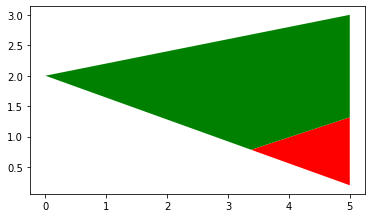

In [8]:
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import LineString, Polygon

# Define the Polygon and the cutting line
line = LineString([(1, 0), (10.11, 3)])
polygon = Polygon([(0, 2), (5, 0.2), (5, 3)])


def cut_polygon_by_line(polygon, line):
    merged = linemerge([polygon.boundary, line])
    borders = unary_union(merged)
    polygons = polygonize(borders)
    return list(polygons)

def plot(shapely_objects, figure_path='fig.png'):
    from matplotlib import pyplot as plt
    import geopandas as gpd
    boundary = gpd.GeoSeries(shapely_objects)
    boundary.plot(color=['red', 'green', 'blue', 'yellow', 'yellow'])
    plt.savefig(figure_path)

result = cut_polygon_by_line(polygon, line)
print(result)
plot(result)


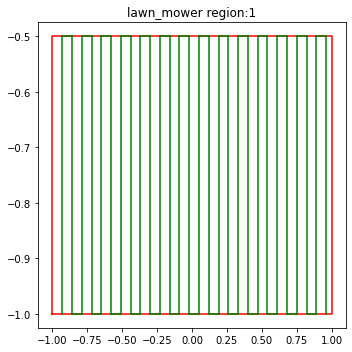

Total distance traveled 15.890000000000008


In [10]:
from math import dist
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import LineString, Polygon
from itertools import chain
import matplotlib.pyplot as plt

def cut_polygon_by_line(polygon, line):
        merged = linemerge([polygon.boundary, line])
        borders = unary_union(merged)
        polygons = polygonize(borders)
        return list(polygons)


def plot(shapely_objects, figure_path='fig.png'):
    from matplotlib import pyplot as plt
    import geopandas as gpd
    boundary = gpd.GeoSeries(shapely_objects)
    boundary.plot(color=['red', 'green', 'blue', 'yellow', 'yellow'])
    plt.savefig(figure_path)


def lawn_mower(poly_region, sen_range):
    x_min, y_min = np.array(poly_region).min(axis=0)[0], np.array(poly_region).min(axis=0)[1]
    x_max, y_max = np.array(poly_region).max(axis=0)[0], np.array(poly_region).max(axis=0)[1]
    
    lines = [([(x, y_min), (x, y_max)]) for x in np.arange(x_min+sen_range, x_max, sen_range)]
    # print(lines)
    
    wave_points = []
    for line in lines:
        # print(line)
        result = cut_polygon_by_line(Polygon(poly_region), LineString(line))
        # print(len(result))
        lis = result[0].intersection(result[1])
        wave_points.append(tuple(lis.coords))
        
        # plot(result)
    
    for iter, wave in enumerate(wave_points):
        if iter%2 == 1:
            wave_points[iter] = (wave[1], wave[0])
        
    wave_points = list(chain.from_iterable(wave_points))
    return wave_points
        
def plot_wavepoints(poly_region, wave_points, region):
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    polygon1 = Polygon(poly_region)
    x, y = polygon1.exterior.xy
    plt.plot(x, y, c="red")
    for iter, wave in enumerate(wave_points[:-1]):
        x_values = [wave_points[iter][0], wave_points[iter+1][0]]
        y_values = [wave_points[iter][1], wave_points[iter+1][1]]
        if iter != len(wave_points):
            plt.plot(x_values, y_values, linestyle='-', c="green")
    plt.title(f"lawn_mower region:{region}")
    plt.show()
    
    
def dis_covered(wave_points):
    dist = sum(
        np.linalg.norm(np.array(wave_points[iter]) - np.array(wave_points[iter + 1]))
        for iter, wave in enumerate(wave_points[:-1])
        if iter != len(wave_points))
            
    return dist

poly_region =  [(-1,-1), (1,-1), (1,-0.5), (-1,-0.5)]
sen_range = 0.07
wave_points = lawn_mower(poly_region, sen_range=sen_range)
# print(wave_points)
plot_wavepoints(poly_region, wave_points, 1)

total_dis_covered = dis_covered(wave_points)
print("Total distance traveled", total_dis_covered)
 


: 

# Midsem 

## Question 1       

[(1.0, 0.0), (1.0, 10.0), (2.0, 10.0), (2.0, 0.0), (3.0, 0.0), (3.0, 10.0), (4.0, 10.0), (4.0, 0.0), (5.0, 0.0), (5.0, 10.0), (6.0, 10.0), (6.0, 0.0), (7.0, 0.0), (7.0, 10.0), (8.0, 10.0), (8.0, 0.0), (9.0, 0.0), (9.0, 10.0)]


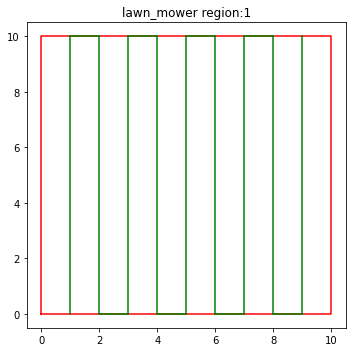

Total distance traveled 98.0


: 

In [ ]:

from math import dist
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import LineString, Polygon
from itertools import chain
import matplotlib.pyplot as plt

def cut_polygon_by_line(polygon, line):
        merged = linemerge([polygon.boundary, line])
        borders = unary_union(merged)
        polygons = polygonize(borders)
        return list(polygons)


def plot(shapely_objects, figure_path='fig.png'):
    from matplotlib import pyplot as plt
    import geopandas as gpd
    boundary = gpd.GeoSeries(shapely_objects)
    boundary.plot(color=['red', 'green', 'blue', 'yellow', 'yellow'])
    plt.savefig(figure_path)


def lawn_mower(poly_region, sen_range):
    x_min, y_min = np.array(poly_region).min(axis=0)[0], np.array(poly_region).min(axis=0)[1]
    x_max, y_max = np.array(poly_region).max(axis=0)[0], np.array(poly_region).max(axis=0)[1]
    
    lines = [([(x, y_min), (x, y_max)]) for x in np.arange(x_min+sen_range, x_max, sen_range)]
    # print(lines)
    
    wave_points = []
    for line in lines:
        # print(line)
        result = cut_polygon_by_line(Polygon(poly_region), LineString(line))
        # print(len(result))
        lis = result[0].intersection(result[1])
        wave_points.append(tuple(lis.coords))
        
        # plot(result)
    
    for iter, wave in enumerate(wave_points):
        if iter%2 == 1:
            wave_points[iter] = (wave[1], wave[0])
        
    wave_points = list(chain.from_iterable(wave_points))
    return wave_points
        
def plot_wavepoints(poly_region, wave_points, region):
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    polygon1 = Polygon(poly_region)
    x, y = polygon1.exterior.xy
    plt.plot(x, y, c="red")
    for iter, wave in enumerate(wave_points[:-1]):
        x_values = [wave_points[iter][0], wave_points[iter+1][0]]
        y_values = [wave_points[iter][1], wave_points[iter+1][1]]
        if iter != len(wave_points):
            plt.plot(x_values, y_values, linestyle='-', c="green")
    plt.title(f"lawn_mower region:{region}")
    plt.show()
    
    
def dis_covered(wave_points):
    dist = sum(
        np.linalg.norm(np.array(wave_points[iter]) - np.array(wave_points[iter + 1]))
        for iter, wave in enumerate(wave_points[:-1])
        if iter != len(wave_points))
            
    return dist

poly_region =  [(0,0), (10,0), (10,10), (0,10)]
sen_range = 1
wave_points = lawn_mower(poly_region, sen_range=sen_range)
print(wave_points)
plot_wavepoints(poly_region, wave_points, 1)

total_dis_covered = dis_covered(wave_points)
print("Total distance traveled", total_dis_covered)
 


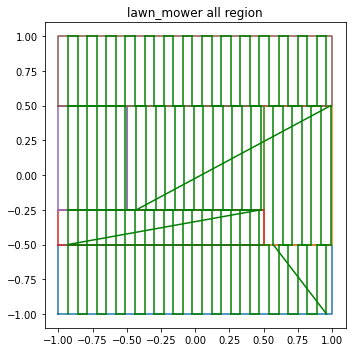

Total distance traveled 68.42200056345858
total time to cover all regions 10.212238890068445


: 

In [ ]:
A = [(-1,-1), (1,-1), (1,-0.5), (-1,-0.5)]
B = [(-1,-0.5), (0.5,-0.5), (0.5,-0.25), (-1,-0.25)]
C = [(0.5,-0.5), (1,-0.5), (1,0.5), (0.5,0.5)]
D = [(-1,-0.25), (-0.5,-0.25), (-0.5,0.5), (-1,0.5)]   
E = [(-0.5,-0.25), (0.5,-0.25), (0.5,0.5), (-0.5,0.5)]
F = [(-1,0.5), (1,0.5), (1,1), (-1,1)]

# regions = {"A":A, "B":B, "C":C, "D":D, "E":E, "F":F}
regions = {"A":A, "C":C,  "E":E, "B":B,  "D":D,  "F":F, }


def plot_region_covered(regions, wave_points):
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    for reg in regions:
        polygon1 = Polygon(regions[reg])
        x, y = polygon1.exterior.xy
        plt.plot(x, y )
    for iter, wave in enumerate(wave_points[:-1]):
        x_values = [wave_points[iter][0], wave_points[iter+1][0]]
        y_values = [wave_points[iter][1], wave_points[iter+1][1]]
        if iter != len(wave_points):
            plt.plot(x_values, y_values, linestyle='-', c="green")
    plt.title(f"lawn_mower all region")
    plt.show()
    

def cover_all_regions(regions, sen_range):
    covered_wave_points = []
    for reg in regions:
        lawn_mower(poly_region, sen_range=sen_range)
        wave_points = lawn_mower(regions[reg], sen_range=sen_range)
        # print(wave_points)
        # plot_wavepoints(regions[reg], wave_points, reg)
        total_dis_covered = dis_covered(wave_points)
        # print("Total distance traveled", total_dis_covered)
        covered_wave_points = covered_wave_points + wave_points
        
    return covered_wave_points
   
def time_taken(distance, speed):
    return distance/speed

sen_range = 0.07     
wave_points = cover_all_regions(regions, sen_range)
plot_region_covered(regions, wave_points)
total_dis_covered = dis_covered(wave_points)
print("Total distance traveled", total_dis_covered)
print("total time to cover all regions", time_taken(total_dis_covered, 6.7))



## Question 3

In [5]:
import pyvisgraph as vg
def visibility_graph_path( start, goal):
        """
        Arguments:
        ----------
        start: start point, tuple
        goal: goal point, tuple
        Returns:
        --------
        shortest: shortest path
        """
        polys = [[vg.Point(start[0], start[1]), vg.Point(goal[0], goal[1]), vg.Point(-0.25,-0.5),
                  vg.Point(0.5,-0.5), vg.Point(0.5,0.5), vg.Point(-0.5,0.5),
                  vg.Point(-0.5,-0.25), vg.Point(0.25,-0.25)]]
        
        g = vg.VisGraph()
        g.build(polys)
        shortest = g.shortest_path(vg.Point(start[0], start[1]), vg.Point(goal[0], goal[1]))
        print(shortest)
        return shortest
start_point = (0, -0.4)
end_point =  (0,0)
shortest_path = visibility_graph_path(start_point, end_point)

100%|██████████| 1/1 [00:00<00:00, 270.43it/s]

[Point(0.00, -0.40), Point(0.25, -0.25), Point(0.00, 0.00)]


In [7]:
import folium
# Plot of the path using folium
geopath = [[point.y, point.x] for point in shortest_path]
geomap  = folium.Map([0, 0], zoom_start=2)
for point in geopath:
    folium.Marker(point, popup=str(point)).add_to(geomap)
folium.PolyLine(geopath).add_to(geomap)

# Add a Mark on the start and positions in a different color
folium.Marker(geopath[0], popup=str(start_point), icon=folium.Icon(color='red')).add_to(geomap)
folium.Marker(geopath[-1], popup=str(end_point), icon=folium.Icon(color='red')).add_to(geomap)

# Save the interactive plot as a map
output_name = 'example_shortest_path_plot.png'
geomap.save(output_name)
print('Output saved to: {}'.format(output_name))

Output saved to: example_shortest_path_plot.png


TypeError: 'Point' object is not subscriptable

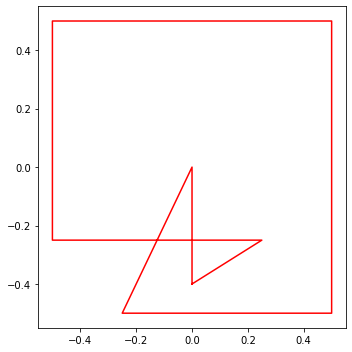

In [12]:
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import LineString, Polygon
def plot_wavepoints(poly_region, wave_points, region):
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    polygon1 = Polygon(poly_region)
    x, y = polygon1.exterior.xy
    plt.plot(x, y, c="red")
    for iter, wave in enumerate(wave_points[:-1]):
        x_values = [wave_points[iter][0], wave_points[iter+1][0]]
        y_values = [wave_points[iter][1], wave_points[iter+1][1]]
        if iter != len(wave_points):
            plt.plot(x_values, y_values, linestyle='-', c="green")
    plt.title(f"lawn_mower region:{region}")


polys = [(start_point[0], start_point[1]), (end_point[0], end_point[1]),(-0.25,-0.5),
                  (0.5,-0.5), (0.5,0.5), (-0.5,0.5),
                  (-0.5,-0.25),(0.25,-0.25)]    
plot_wavepoints(polys,shortest_path, 1)